Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

**1. MENAMPILKAN DATA**

In [ ]:
csv_path = "/content/train.csv"
df = pd.read_csv(csv_path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
important_cols = ["ram", "blue", "dual_sim","four_g","three_g","touch_screen","wifi","n_cores", "price_range"]

df = df[important_cols]

In [ ]:
df

,ram,blue,dual_sim,four_g,three_g,touch_screen,wifi,n_cores,price_range
0,2549,0,0,0,0,0,1,2,1
1,2631,1,1,1,1,1,0,3,2
2,2603,1,1,1,1,1,0,5,2
3,2769,1,0,0,1,0,0,6,2
4,1411,1,0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...
1995,668,1,1,1,1,1,0,6,0
1996,2032,1,1,0,1,1,1,4,2
1997,3057,0,1,1,1,1,0,8,3
1998,869,0,0,1,1,1,1,5,0


**2. TAHAP PRAPROSES**

Memeriksa Missing Value

In [ ]:
df.describe(include="all")

,ram,blue,dual_sim,four_g,three_g,touch_screen,wifi,n_cores,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2124.213000,0.4950,0.509500,0.521500,0.761500,0.503000,0.507000,4.520500,1.500000
std,1084.732044,0.5001,0.500035,0.499662,0.426273,0.500116,0.500076,2.287837,1.118314
min,256.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1207.500000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.750000
50%,2146.500000,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.500000
75%,3064.500000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,2.250000
max,3998.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,3.000000


In [ ]:
df.isnull().sum()

ram             0
blue            0
dual_sim        0
four_g          0
three_g         0
touch_screen    0
wifi            0
n_cores         0
price_range     0
dtype: int64

**VISUALISASI**

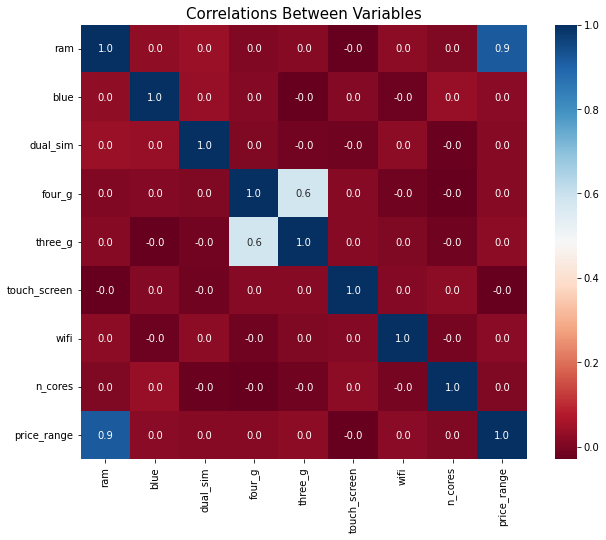

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu",annot=True, fmt=".1f")
plt.title("Correlations Between Variables", size=15)
plt.show();

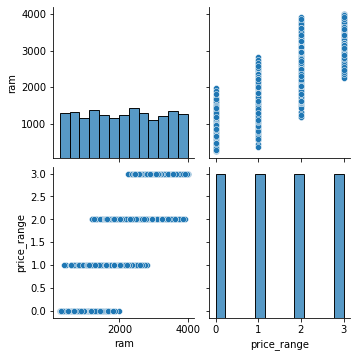

In [ ]:
sns.pairplot(df[["ram", "price_range"]]);

**3. MEMBAGI DATA Train (80%) dan Test (20%)**

Memisahkan Data fitur X dan Data prediksi Y




In [ ]:
x = df.iloc[:,0:7].values
y = df.iloc[:, -1].values

In [ ]:
print (x)

[[2549    0    0 ...    0    0    1]
 [2631    1    1 ...    1    1    0]
 [2603    1    1 ...    1    1    0]
 ...
 [3057    0    1 ...    1    1    0]
 [ 869    0    0 ...    1    1    1]
 [3919    1    1 ...    1    1    1]]


In [ ]:
print (y)

[1 2 2 ... 3 0 3]


In [ ]:
#Membagi data train dan test menggunakan sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#melihat jumlah data train
x_train.shape

(1500, 7)

In [ ]:
#melihat jumlah data test
x_test.shape

(500, 7)

*

**STANDARISASI DATA**

In [ ]:
label = LabelEncoder()
y_train =  label.fit_transform(y_train)
y_test = label.transform(y_test)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform (x_train)
x_test = sc.transform(x_test)

**4. MEMBANGUN MODEL DENGAN ALGORTIMA**

**5. MENAMPILKAN NILAI AKURASI, PRECISION, RECALL, DAN F1 SCORE**

Menggunakan Regresi

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lm = LogisticRegression()
clf_lm.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print(clf_lm.coef_)
print(clf_lm.intercept_)

[[-5.87980761e+00 -2.33551975e-02  7.50173890e-02  4.40303464e-02
  -1.14106836e-01  7.62248133e-04 -1.45591893e-02]
 [-1.67213389e+00 -2.22803636e-02  1.00412462e-01  3.72550393e-02
  -6.84087102e-03  1.78766764e-02  2.13676690e-02]
 [ 1.88530844e+00 -1.86289098e-02 -2.77734697e-02 -1.36150844e-01
   7.53010571e-02 -5.93769563e-02  8.88174542e-03]
 [ 5.66663306e+00  6.42644709e-02 -1.47656382e-01  5.48654584e-02
   4.56466503e-02  4.07380318e-02 -1.56902251e-02]]
[-1.77887952  1.77013505  1.64565053 -1.63690606]


In [ ]:
y_pred = clf_lm.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7620

               precision    recall  f1-score   support

           0       0.84      0.86      0.85       121
           1       0.66      0.63      0.65       115
           2       0.63      0.69      0.66       115
           3       0.89      0.84      0.86       149

    accuracy                           0.76       500
   macro avg       0.76      0.76      0.75       500
weighted avg       0.77      0.76      0.76       500



Menggunakan Algortima Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dc = DecisionTreeClassifier() 
clf_dc.fit(x_train, y_train) 

y_pred = clf_dc.predict(x_test)

Menggunakan Algoritma SVM

In [ ]:
from sklearn.svm import SVC 
clf_svm = SVC() 
clf_svm.fit(x_train, y_train) 

y_pred = clf_svm.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7580

               precision    recall  f1-score   support

           0       0.85      0.86      0.85       122
           1       0.67      0.62      0.65       119
           2       0.61      0.68      0.64       112
           3       0.88      0.84      0.86       147

    accuracy                           0.76       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.76      0.76      0.76       500



*SVM dengan Kernel Linear*

In [ ]:
clf_svm = SVC(kernel='linear') 
clf_svm.fit(x_train, y_train) 

y_pred = clf_svm.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7540

               precision    recall  f1-score   support

           0       0.83      0.86      0.84       120
           1       0.66      0.62      0.64       118
           2       0.62      0.67      0.65       116
           3       0.87      0.84      0.86       146

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.76      0.75      0.75       500



*SVM dengan Kernel rbf*

In [ ]:
clf_svm = SVC(kernel='rbf') 
clf_svm.fit(x_train, y_train) 

y_pred = clf_svm.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7580

               precision    recall  f1-score   support

           0       0.85      0.86      0.85       122
           1       0.67      0.62      0.65       119
           2       0.61      0.68      0.64       112
           3       0.88      0.84      0.86       147

    accuracy                           0.76       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.76      0.76      0.76       500



*SVM dengan Kernel poly*

In [ ]:
clf_svm = SVC(kernel='poly') 
clf_svm.fit(x_train, y_train) 

y_pred = clf_svm.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7480

               precision    recall  f1-score   support

           0       0.82      0.87      0.85       117
           1       0.65      0.61      0.63       119
           2       0.65      0.64      0.65       126
           3       0.84      0.86      0.85       138

    accuracy                           0.75       500
   macro avg       0.74      0.75      0.74       500
weighted avg       0.74      0.75      0.75       500



*SVM dengan Kernel Sigmoid*

In [ ]:
clf_svm = SVC(kernel='sigmoid') 
clf_svm.fit(x_train, y_train) 

y_pred = clf_svm.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.6600

               precision    recall  f1-score   support

           0       0.81      0.79      0.80       126
           1       0.58      0.49      0.53       131
           2       0.46      0.54      0.49       106
           3       0.77      0.80      0.78       137

    accuracy                           0.66       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.66      0.66      0.66       500



Menggunakan Algortima KNN

*KNN dengan Metric Minkowski*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
clf_knn.fit(x_train, y_train)

y_pred = clf_knn.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7020

               precision    recall  f1-score   support

           0       0.80      0.81      0.80       122
           1       0.59      0.52      0.56       124
           2       0.58      0.60      0.59       122
           3       0.81      0.86      0.84       132

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.70       500
weighted avg       0.70      0.70      0.70       500



*KNN dengan Metric Euclidean*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p=2)
clf_knn.fit(x_train, y_train)

y_pred = clf_knn.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7020

               precision    recall  f1-score   support

           0       0.80      0.81      0.80       122
           1       0.59      0.52      0.56       124
           2       0.58      0.60      0.59       122
           3       0.81      0.86      0.84       132

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.70       500
weighted avg       0.70      0.70      0.70       500



*KNN dengan Metric Manhattan*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'cityblock', p=2)
clf_knn.fit(x_train, y_train)

y_pred = clf_knn.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7020

               precision    recall  f1-score   support

           0       0.80      0.81      0.80       122
           1       0.59      0.52      0.56       124
           2       0.58      0.60      0.59       122
           3       0.81      0.86      0.84       132

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.70       500
weighted avg       0.70      0.70      0.70       500



*KNN dengan Metric Chebyshev*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'chebyshev', p=2)
clf_knn.fit(x_train, y_train)

y_pred = clf_knn.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7020

               precision    recall  f1-score   support

           0       0.80      0.81      0.80       122
           1       0.59      0.52      0.56       124
           2       0.58      0.60      0.59       122
           3       0.81      0.86      0.84       132

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.70       500
weighted avg       0.70      0.70      0.70       500



Menggunakan Algortima Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train,y_train)

y_pred = clf_rf.predict(x_test)

In [ ]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.6840

               precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.59      0.55      0.57       119
           2       0.54      0.55      0.55       123
           3       0.78      0.81      0.80       135

    accuracy                           0.68       500
   macro avg       0.68      0.68      0.68       500
weighted avg       0.68      0.68      0.68       500



In [ ]:
models = [
    clf_lm,
    clf_dc,
    clf_svm,
    clf_knn,
    clf_rf
]

results = []
results = pd.DataFrame(columns=["Models","Accuracy"])

for model in models:
    Name = model.__class__.__name__
    y_pred = model.predict(x_test)
    Accuracy = accuracy_score(y_test,y_pred)
    result = pd.DataFrame([[Name, Accuracy*100]], columns = ["Models","Accuracy"])
    results = results.append(result)

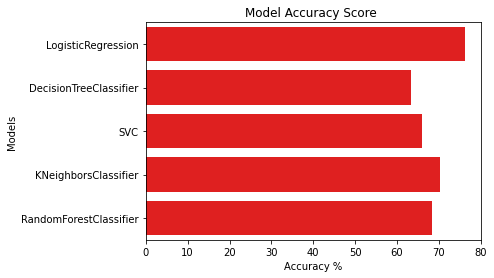

In [ ]:
sns.barplot(x='Accuracy', y='Models', data=results, color = "r")
plt.xlabel('Accuracy %')
plt.title('Model Accuracy Score ');